In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import copy

import sys
sys.path.append('/Users/clementinechazal/Documents/these/kernel_path')
import functions as fc

In [2]:
n = 300
d = 2

Mu = [-10*np.ones(2), 10*np.ones(2)]
Sigma = [np.identity(2), np.identity(2)]
p = [1/2, 1/2]

# Mu = [-5*np.ones(2), 5*np.ones(2),np.array([-5,5]),np.array([5,-5])]
# Sigma = [np.identity(2), np.identity(2),np.identity(2),np.identity(2)]
# p = [1/4, 1/4,1/4,1/4]

X1 =fc.mixt_gauss(Mu, Sigma, n, p)
# mask = (X1[:, 0] > 1) & (X1[:, 1] > 1)
# mask_inv = ~mask

# Mu = [ 3* np.ones(2)]
# Sigma = [np.identity(d)]
# p = [1]
# X1 =fc.mixt_gauss(Mu, Sigma, n, p) # Samples from the target distribution pi_1, a mixture of 2 gaussians

In [3]:
sigma = 2
k = lambda x,y : fc.k_gauss(x,y,sigma)
dk = lambda x,y : fc.dk_gauss(x,y,sigma)
ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)

# k = lambda x,y : fc.k_linear(x,y)
# dk = lambda x,y : fc.dk_linear(x,y)
# ddk = lambda x,y : fc.ddk_linear(x,y)


In [4]:
def V(phi,Z,score,Y):
    M = k(Y,Z)[:,:,None] * score[None,:,:] + np.transpose(dk(Z,Y), (1,0,2))
    v = 1/n * np.sum(phi[None, :, None] * M, axis=1)
    return v


iter0
iter5
iter10
iter15
iter20
iter25
iter30
iter35
iter40
iter45
iter50
iter55
iter60
iter65
iter70
iter75
iter80
iter85
iter90
iter95
iter100
iter105
iter110
iter115
iter120
iter125
iter130
iter135
iter140
iter145
iter150
iter155
iter160
iter165
iter170
iter175
iter180
iter185
iter190
iter195
iter200
iter205
iter210
iter215
iter220
iter225
iter230
iter235
iter240
iter245
iter250
iter255
iter260
iter265
iter270
iter275
iter280
iter285
iter290
iter295


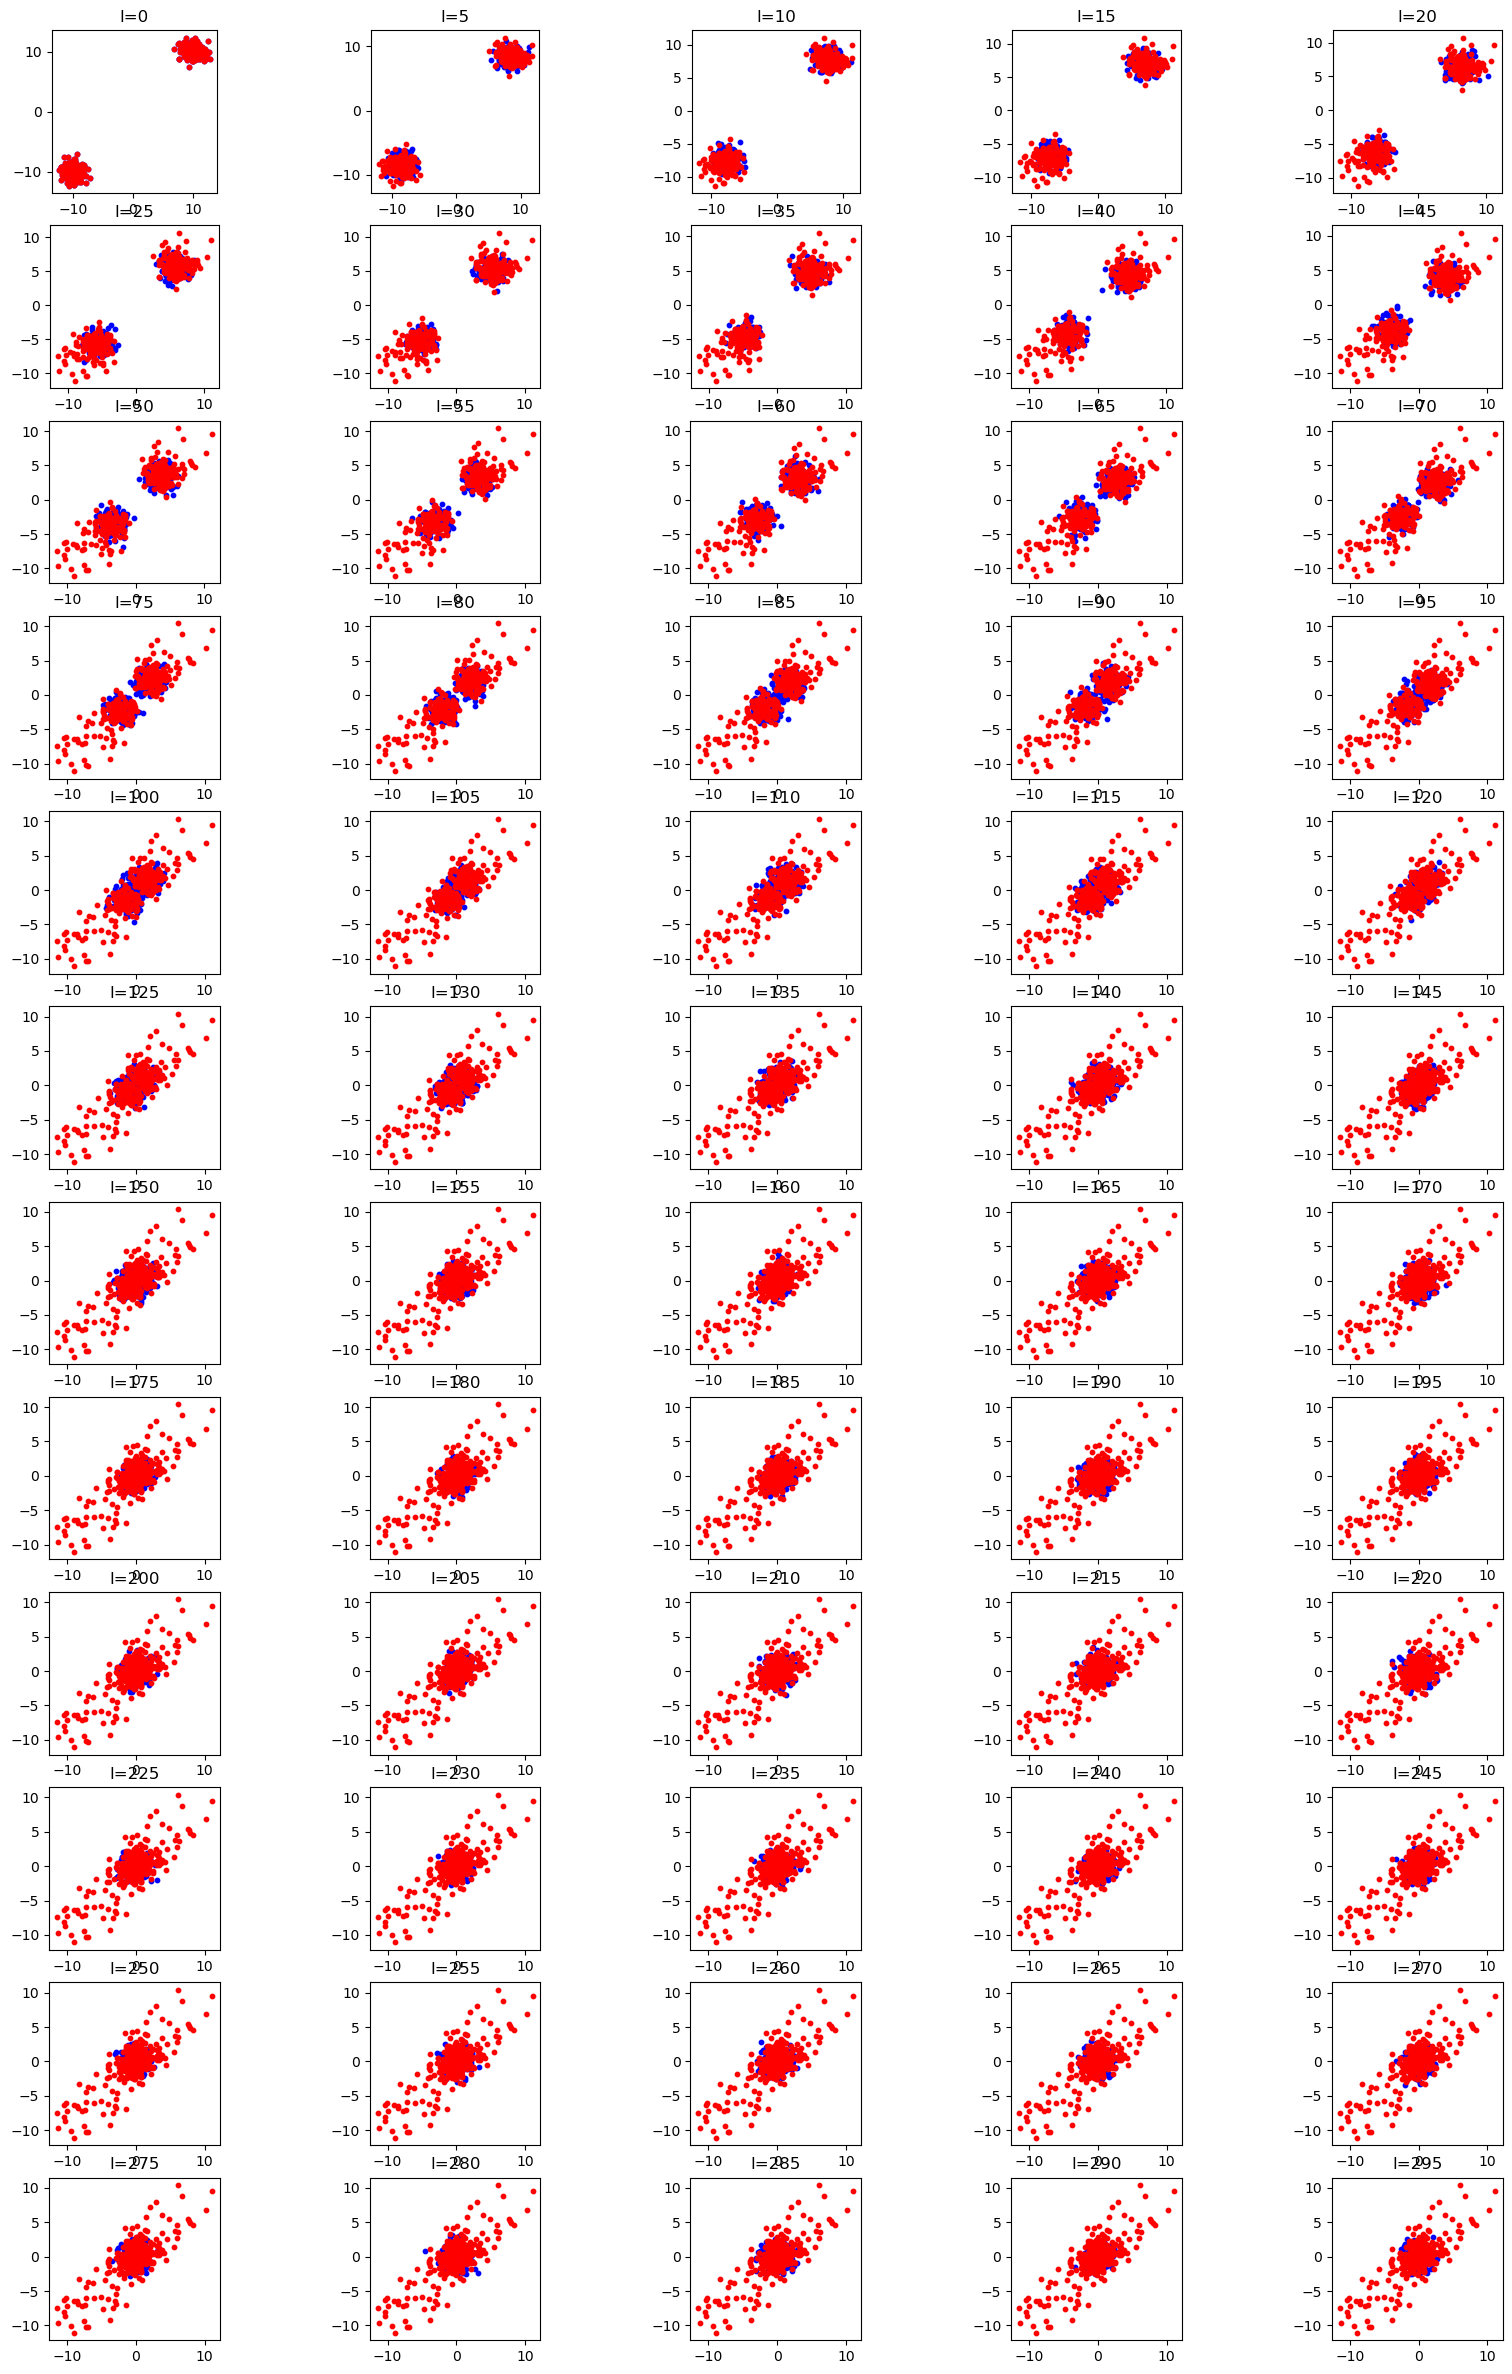

In [ ]:
import functions as fc
import importlib
importlib.reload(fc)


N_iter = 300
t1 = 0.095
tau = 0.02
lambd = 1e-3
X = X1 
Z = X1
Y = X1
L1 = []
L2 = []
fig, axs = plt.subplots(nrows=2*N_iter//50, ncols=5, figsize=(20, N_iter//10))
norm_V_H = []
norm_V_2 = []
Phi = []
ZZ = []
T = []
XX  = [X1]
SCORE = []


xlim = (-4, 4)
ylim = (-4, 4)

for l in range(N_iter):
    t = l * tau + t1
     
    if l%5 == 0:
        print('iter'+str(l))
        ll = l//5
        ax = axs[ll//5, ll%5]
        ax.scatter(Z[:, 0], Z[:, 1],color = "blue", label = "OU dynamics",s=10) 
        ax.scatter(X[:, 0], X[:, 1],color = "red", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10)
        #ax.scatter(X[mask_inv][:, 0], X[mask_inv][:, 1],color = "red", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10)
        ax.set_title(f'l={l}')
        ax.set_aspect('equal')
        # ax.set_xlim(xlim)
        # ax.set_ylim(ylim)
    #     ax.legend()

    
    

    eps = np.random.randn(n, d)
    psi = fc.psi(X1, eps, t)
    sigma_t = np.sqrt(fc.sigma_2(t))

    Z = np.exp(-t) * X1 + sigma_t * eps #Ornstein-Uhlenbeck dynamics     
    Xi = fc.Xi(Z, eps, k, dk, ddk, t)
    phi = np.linalg.inv(1/n * Xi + lambd * np.identity(n)) @ psi
    Phi.append(phi.copy())
    T.append(t)
    ZZ.append(Z.copy())
    XX.append(X.copy())
    score = -1 * eps / sigma_t
    SCORE.append(score.copy())
    
    if l == 0:
        X = X + t1 * V(Phi[l],ZZ[l],SCORE[l],XX[l]) 
    else:
        X = X + tau * V(Phi[l],ZZ[l],SCORE[l],XX[l]) 

In [6]:
# W = X1
# xlim = (-6, 6)
# ylim = (-6, 6)

# plt.scatter(W[:,0],W[:,1])
# for i in range(N_iter):
#     if i==0 :
#         W = W + t1 * V(Phi[i],ZZ[i],SCORE[i],XX[i])
#     else:
#         W = W + tau * V(Phi[i],ZZ[i],SCORE[i],XX[i])
#     if i%20 == 0 :
#         plt.figure()
#         plt.scatter(W[:,0],W[:,1])
#         # plt.set_xlim(xlim)
#         # plt.set_lim(ylim)
#         plt.show()

In [7]:
# import functions as fc
# import importlib
# importlib.reload(fc)


# N_iter = 300
# s1 = 0.095
# ds = 0.003
# lambd = 1e-3
# X = X1 
# Z = X1
# Y = X1
# L1 = []
# L2 = []
# fig, axs = plt.subplots(nrows=2*N_iter//50, ncols=5, figsize=(20, N_iter//10))
# norm_V_H = []
# norm_V_2 = []
# Phi = []
# ZZ = []
# T = []


# xlim = (-4, 4)
# ylim = (-4, 4)

# for l in range(N_iter):
#     s = l * ds + s1
#     t = np.log(1/(1-s))
#     print('s = ' + str(s))
#     print("t = " + str(t))
     
#     if l%5 == 0:
#         print('iter'+str(l))
#         ll = l//5
    #     ax = axs[ll//5, ll%5]
    #     #ax.scatter(Y[:, 0], Y[:, 1],color = "lightblue",s=10)
    #     ax.scatter(Z[:, 0], Z[:, 1],color = "blue", label = "OU dynamics",s=10) 
    #     ax.scatter(X[:, 0], X[:, 1],color = "red", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10)
    #     #ax.scatter(X[mask_inv][:, 0], X[mask_inv][:, 1],color = "red", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10)
    #     ax.set_title(f'l={l}')
    #     ax.set_aspect('equal')
    #     # ax.set_xlim(xlim)
    #     # ax.set_ylim(ylim)
    # #     ax.legend()

    
    

    # eps = np.random.randn(n, d)
    # psi = fc.psi(X1, eps, t)
    # sigma_t = np.sqrt(fc.sigma_2(t))

    # Z = np.exp(-t) * X1 + sigma_t * eps #Ornstein-Uhlenbeck dynamics     
    # Xi = fc.Xi(Z, eps, k, dk, ddk, t)
    # phi = np.linalg.inv(1/n * Xi + lambd * np.identity(n)) @ psi
    # Phi.append(phi.copy())
    # T.append(t.copy())
    # ZZ.append(Z.copy())
    # score = -1 * eps / sigma_t
    # M = lambda x : k(x,Z)[:,:,None] * score[None,:,:] + np.transpose(dk(Z,x), (1,0,2))
    # v =  lambda x : 1/n * np.sum(phi[None, :, None] * M(x), axis=1)
    
    # norm_V_H.append(np.sqrt(1/n**2 * phi.T @ Xi @ phi))
    # norm_V_2.append(np.linalg.norm(v(X)[0]))
    # print(np.sqrt(1/n**2 * phi.T @ Xi @ phi))
    # print(np.linalg.norm(v(X)[0]))
    

    # # L1.append(fc.Loss1(v,Z,Mu[0],phi,Xi,t,k,dk,sigma,lambd))
    # L2.append(fc.Loss2(v,Z,eps,Mu[0],phi,Xi,psi,t,k,dk,sigma,lambd))

    # tau = np.log((1-s)/(1-s-ds))
    # print(r' $\tau = $ ' + str(tau))
    # print()
    # if l == 0:
    #     X = X + np.log((1-s1)/(1-s1-ds)) * v(X) #ou tau + t1 ? 
    # else:
    #     X = X + tau * v(X)
    # Y = Z + tau * v(Z)


 

In the next cell, we start form a set of particules $Y_j \sim \gamma^d$ and inverse OU process with the objective to recover a sample for $\pi_1$. I doesn't work yet. 

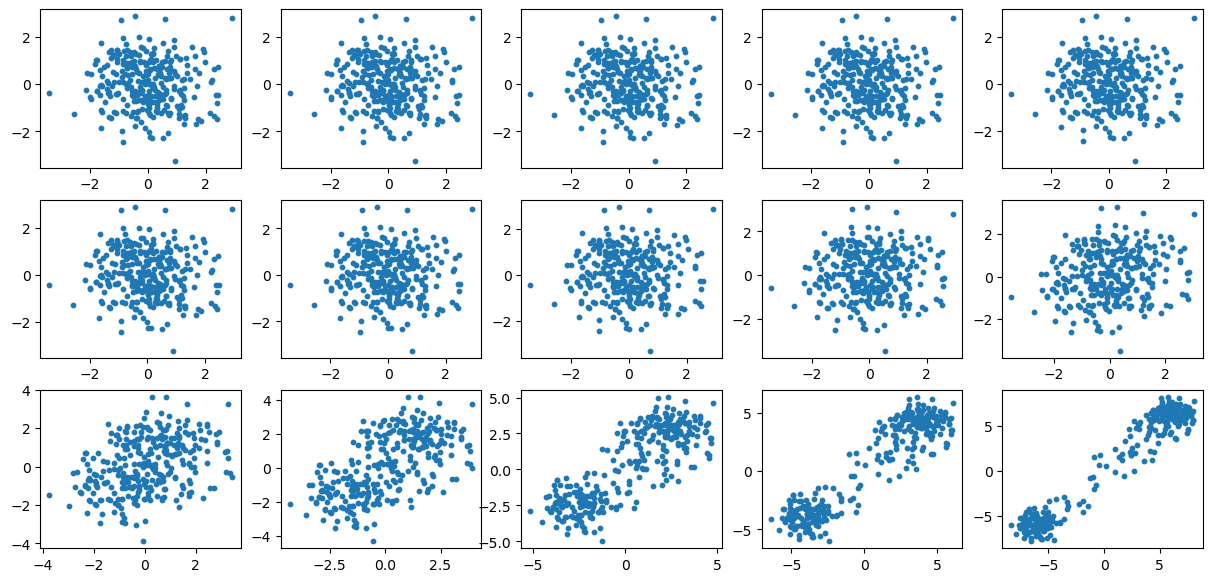

In [15]:
m = 300
Y =  scs.multivariate_normal.rvs(np.zeros(d),np.identity(d),m)

fig, axs = plt.subplots(nrows=N_iter//100, ncols=5, figsize=(15, N_iter//40))

for i in range(N_iter):
    # for k in range(m):
    #     print(Y[k])
    #     print(V[N_iter-1-i](np.array([Y[k]])))
    #     Y[k] = Y[k] - tau * V[N_iter-1-i](np.array([Y[k]]))[0]

    Y = Y - tau * V(Phi[N_iter-2-i], ZZ[N_iter-2-i], SCORE[N_iter-2-i], Y)
    #print(np.linalg.norm(V[N_iter-1-i](Y)[0]))
    if i % 20 == 0:
        j = i//20
        ax = axs[j//5, j%5]
        ax.scatter(Y[:,0], Y[:,1], s=10)
    #print(Y[0])


#plt.scatter(Y[:,0], Y[:,1])
#plt.show()
